In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [94]:
# load and investigate the data here:
data = pd.read_csv('tennis_stats.csv')
df = pd.DataFrame(data)

In [95]:
# perform exploratory analysis here:

In [96]:
df.head(3)

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119


In [97]:
df.shape

(1721, 24)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

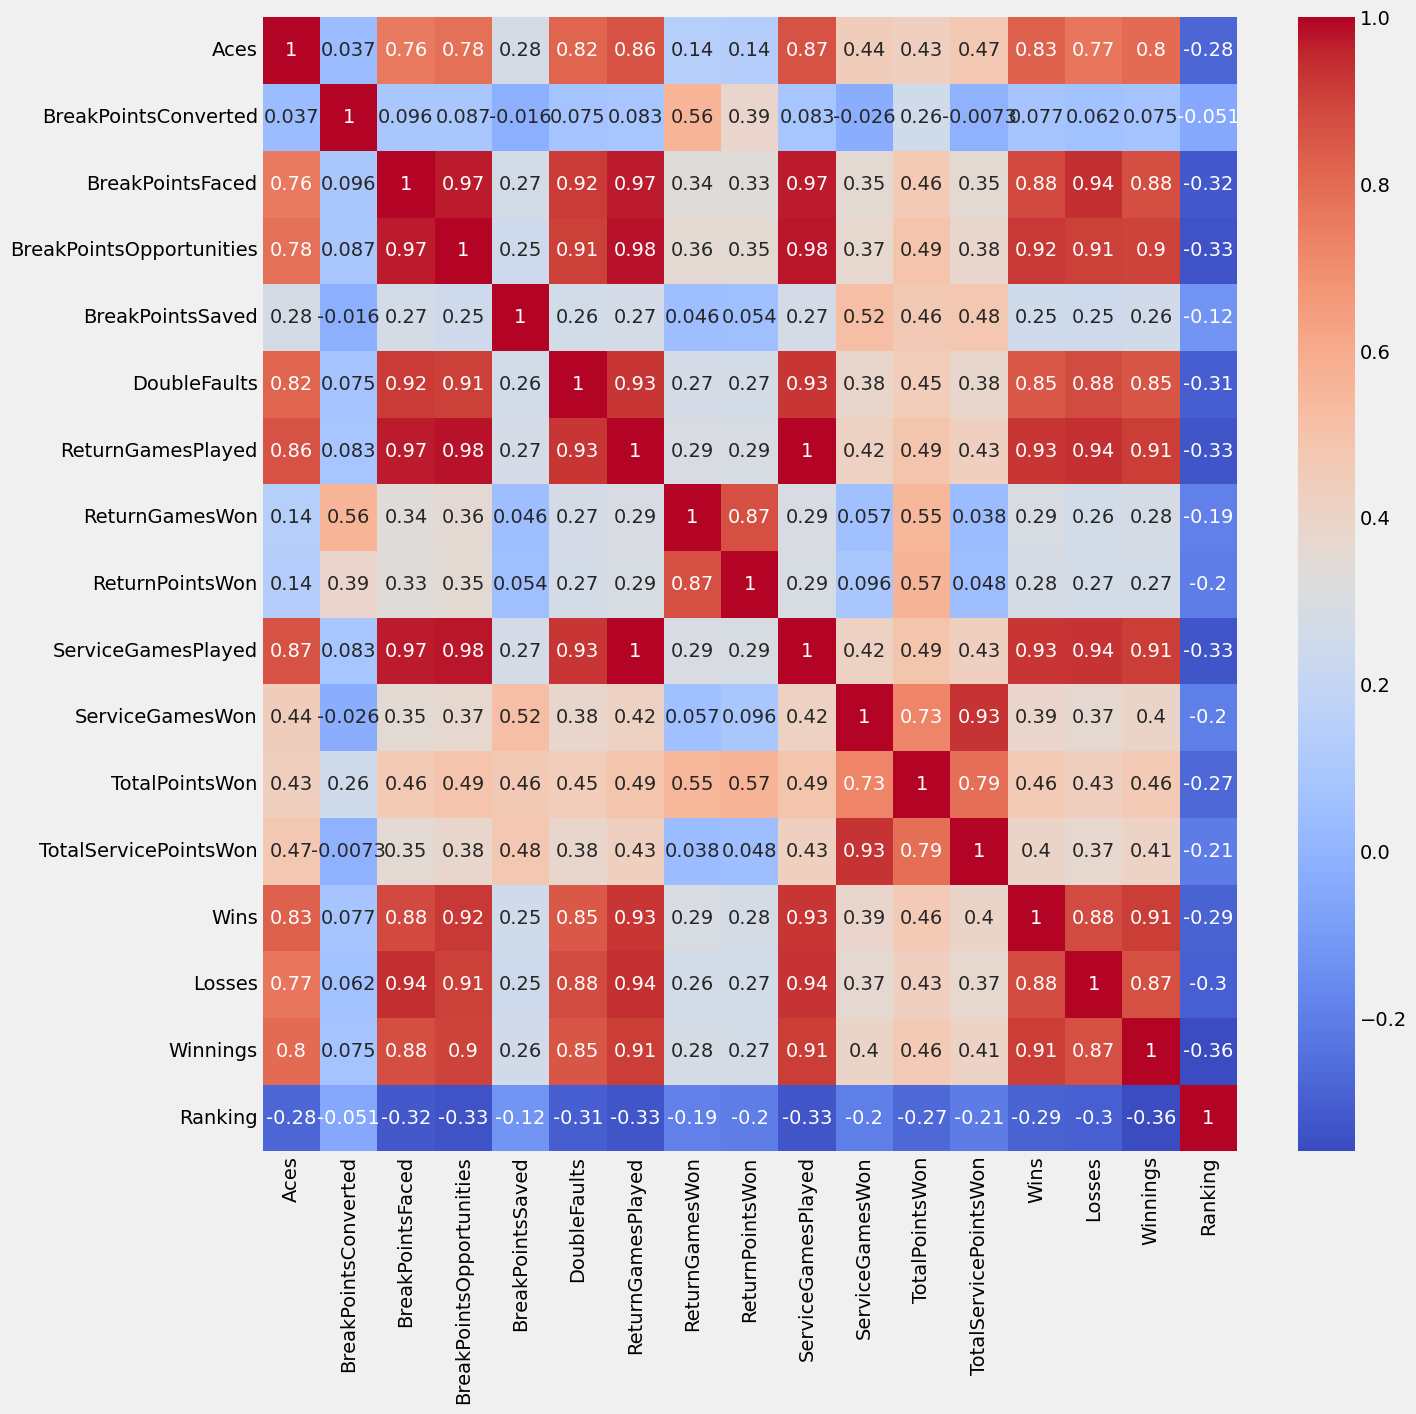

<Figure size 640x480 with 0 Axes>

In [99]:
plt.figure(figsize=[14, 14])
sns.heatmap(df[df.columns.to_list()[7:]].corr(), annot=True, cmap='coolwarm')
plt.show()
plt.clf()

In [100]:
## perform single feature linear regressions here:

In [101]:
columns = df.columns.to_list()[7:23]

In [102]:
df.Year.unique()

array([2016, 2017, 2010, 2014, 2011, 2009, 2012, 2013, 2015], dtype=int64)

In [103]:
for feature in columns:
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=[8, 5])
    sns.scatterplot(x='Wins', y=feature, data=df, hue='Year', palette='rocket')
    plt.title(f'Scatter plot of {df.columns.to_list()[-4]} and {feature}')
    plt.show()
    plt.clf()
    plt.figure(figsize=[8, 5])
    sns.scatterplot(x='Winnings', y=feature, data=df, hue='Year', palette='rocket')
    plt.title(f'Scatter plot of {df.columns.to_list()[-2]} and {feature}')
    plt.show()
    plt.clf()


In [ ]:
columns

In [ ]:
## perform two feature linear regressions here:


In [ ]:
X1 = df[['Aces', 'ReturnGamesPlayed']]
y = df[['Wins']]
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y, train_size=0.8, test_size=0.2, random_state=6)
mlr1 = LinearRegression()

In [ ]:
model1 = mlr1.fit(x_train1, y_train1)
y_predict1 = model1.predict(x_test1)
mlr1.coef_



In [ ]:
mlr1.score(x_train1, y_train1)

In [ ]:
mlr1.score(x_test1, y_test1)

In [ ]:
plt.figure(figsize=[8, 5])
plt.scatter(y_test1, y_predict1)
plt.title('Actual and predicted Wins - Feature 2')
plt.xlabel('Actual number of Wins')
plt.ylabel('Predicted number of Wins')
plt.show()
plt.clf()

In [ ]:
## perform multiple feature linear regressions here:


In [ ]:
X2 = df[['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed', 'Losses']]
y = df[['Wins']]
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y, train_size = 0.8, test_size = 0.2, random_state=6)
mlr2 = LinearRegression()
model2 = mlr2.fit(x_train2, y_train2)
y_predict2 = mlr2.predict(x_test2)

In [ ]:
mlr2.score(x_train2, y_train2)

In [ ]:
mlr2.score(x_test2, y_test2)

In [ ]:
plt.figure(figsize=[8, 5])
plt.scatter(y_test2, y_predict2)
plt.title('Actual and predicted Wins - Feature 7')
plt.xlabel('Actual number of Wins')
plt.ylabel('Predicted number of Wins')
plt.show()
plt.clf()

In [ ]:
plt.scatter(df['FirstServeReturnPointsWon'],df['Winnings'])
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(df['BreakPointsOpportunities'],df['Winnings'])
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(df['BreakPointsSaved'],df['Winnings'])
plt.title('BreakPointsSaved vs Winnings')
plt.xlabel('BreakPointsSaved')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(df['TotalPointsWon'],df['Ranking'])
plt.title('TotalPointsWon vs Ranking')
plt.xlabel('TotalPointsWon')
plt.ylabel('Ranking')
plt.show()
plt.clf()

plt.scatter(df['TotalServicePointsWon'],df['Wins'])
plt.title('TotalServicePointsWon vs Wins')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()
plt.clf()

## single feature linear regression (Aces)

# select features and value to predict
features = df[['Aces']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Aces Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## single feature linear regression (BreakPointsOpportunities)

# select features and value to predict
features = df[['BreakPointsOpportunities']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with BreakPointsOpportunities Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## two feature linear regression

# select features and value to predict
features = df[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with 2 Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## multiple features linear regression

# select features and value to predict
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon','SecondServePointsWon','SecondServeReturnPointsWon','Aces','BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities','BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()